# 1 часть

In [1]:
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

# 1.3

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


1) Разбиение датасета на тренировочную, валидационную и тестовую выборки

In [4]:
train_validation, test = train_test_split(df, test_size=0.3)
train, validation = train_test_split(train_validation, test_size = 0.5)

2) преобразование категориального признака ocean_proximity через кодировку Dummy

In [5]:
train = pd.get_dummies(train, columns=['ocean_proximity'])
test = pd.get_dummies(test, columns=['ocean_proximity'])
validation = pd.get_dummies(validation, columns=['ocean_proximity'])

In [6]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7419,-118.20,33.96,44.0,2144.0,477.0,1760.0,452.0,2.3221,161600.0,1,0,0,0,0
4255,-118.35,34.10,20.0,2745.0,782.0,1161.0,739.0,3.9044,436400.0,1,0,0,0,0
15077,-116.99,32.81,18.0,10968.0,1521.0,4439.0,1501.0,6.2787,250000.0,1,0,0,0,0
3973,-118.58,34.19,15.0,3061.0,1079.0,2173.0,1078.0,2.8500,187500.0,1,0,0,0,0
1905,-119.96,38.84,17.0,2722.0,512.0,828.0,289.0,3.5714,109700.0,0,1,0,0,0


3) Замена признаков total_rooms и total_bedrooms на average_* путем деления на households

In [7]:
train['total_rooms'] /= train['households']
train['total_bedrooms'] /= train['households']
train.rename(columns={'total_rooms':'average_rooms', 'total_bedrooms':'average_bedrooms'}, inplace=True)

In [8]:
test['total_rooms'] /= test['households']
test['total_bedrooms'] /= test['households']
test.rename(columns={'total_rooms':'average_rooms', 'total_bedrooms':'average_bedrooms'}, inplace=True)

In [9]:
validation['total_rooms'] /= validation['households']
validation['total_bedrooms'] /= validation['households']
validation.rename(columns={'total_rooms':'average_rooms', 'total_bedrooms':'average_bedrooms'}, inplace=True)

In [10]:
train.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7419,-118.20,33.96,44.0,4.743363,1.055310,1760.0,452.0,2.3221,161600.0,1,0,0,0,0
4255,-118.35,34.10,20.0,3.714479,1.058187,1161.0,739.0,3.9044,436400.0,1,0,0,0,0
15077,-116.99,32.81,18.0,7.307129,1.013324,4439.0,1501.0,6.2787,250000.0,1,0,0,0,0
3973,-118.58,34.19,15.0,2.839518,1.000928,2173.0,1078.0,2.8500,187500.0,1,0,0,0,0
1905,-119.96,38.84,17.0,9.418685,1.771626,828.0,289.0,3.5714,109700.0,0,1,0,0,0


In [11]:
test.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5627,-118.27,33.77,39.0,3.621339,1.014644,2115.0,478.0,1.5369,141300.0,0,0,0,0,1
5479,-118.45,34.00,48.0,4.441109,0.942263,1142.0,433.0,4.5750,326700.0,1,0,0,0,0
8610,-118.36,33.86,37.0,6.096552,1.082759,802.0,290.0,5.0784,295900.0,1,0,0,0,0
5117,-118.28,33.96,34.0,4.035019,1.093385,1913.0,514.0,1.6156,102100.0,1,0,0,0,0
4944,-118.29,34.01,40.0,4.004525,1.411765,799.0,221.0,1.1667,143800.0,1,0,0,0,0


In [12]:
validation.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12762,-121.40,38.63,31.0,3.468468,1.018018,1079.0,444.0,1.8571,98700.0,0,1,0,0,0
737,-122.13,37.67,38.0,6.060241,1.045181,880.0,332.0,3.1734,181600.0,0,0,0,1,0
15548,-117.09,33.12,11.0,3.478528,1.128834,620.0,163.0,2.5284,122500.0,1,0,0,0,0
14500,-117.23,32.86,15.0,6.039007,1.134752,587.0,282.0,5.0855,209800.0,0,0,0,0,1
7557,-118.19,33.91,35.0,3.817280,1.059490,2935.0,706.0,2.0134,132400.0,1,0,0,0,0


4) Определение кол-ва отсутствующих значений и их удаление

In [13]:
print('train: ',train['average_bedrooms'].isnull().sum())
print('validation: ',validation['average_bedrooms'].isnull().sum())
print('test: ',test['average_bedrooms'].isnull().sum())

train:  73
validation:  70
test:  64


In [14]:
train_no_null = train.dropna(axis=0)
print(train_no_null.isnull().sum())

longitude                     0
latitude                      0
housing_median_age            0
average_rooms                 0
average_bedrooms              0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


In [15]:
X_train, y_train = train_no_null[['average_rooms']], train_no_null['average_bedrooms']
# print(type(train_no_null['average_rooms']))
# print(type(train_no_null[['average_rooms']]))

In [16]:
clf = LinearRegression().fit(X_train, y_train)
predictions = clf.predict(X_train)
print('RMSE: {}'.format(np.sqrt(MSE(y_train, predictions))))

RMSE: 0.2754280175407697


In [17]:
train_nan_bedrooms = train['average_bedrooms'].isnull()
train_nan_rooms = train.loc[train_nan_bedrooms, ['average_rooms']]
train.loc[train_nan_bedrooms, 'average_bedrooms'] = clf.predict((train_nan_rooms))
print(train['average_bedrooms'].isnull().sum())

0


In [18]:
validation_nan_bedrooms = validation['average_bedrooms'].isnull()
validation_nan_rooms = validation.loc[validation_nan_bedrooms, ['average_rooms']]
validation.loc[validation_nan_bedrooms, 'average_bedrooms'] = clf.predict((validation_nan_rooms))
print(validation['average_bedrooms'].isnull().sum())

0


In [19]:
test_nan_bedrooms = test['average_bedrooms'].isnull()
test_nan_rooms = test.loc[test_nan_bedrooms, ['average_rooms']]
test.loc[test_nan_bedrooms, 'average_bedrooms'] = clf.predict((test_nan_rooms))
print(test['average_bedrooms'].isnull().sum())

0


5) Нормализация признаков longitude и latitude

In [20]:
train['longitude'] -= np.mean(train['longitude'])
train['longitude'] /= np.std(train['longitude'])
train['latitude'] -= np.mean(train['latitude'])
train['latitude'] /= np.std(train['latitude'])

In [21]:
validation['longitude'] -= np.mean(validation['longitude'])
validation['longitude'] /= np.std(validation['longitude'])
validation['latitude'] -= np.mean(validation['latitude'])
validation['latitude'] /= np.std(validation['latitude'])

In [22]:
test['longitude'] -= np.mean(test['longitude'])
test['longitude'] /= np.std(test['longitude'])
test['latitude'] -= np.mean(test['latitude'])
test['latitude'] /= np.std(test['latitude'])

In [23]:
train.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7419,0.690159,-0.790993,44.0,4.743363,1.055310,1760.0,452.0,2.3221,161600.0,1,0,0,0,0
4255,0.615087,-0.725956,20.0,3.714479,1.058187,1161.0,739.0,3.9044,436400.0,1,0,0,0,0
15077,1.295744,-1.325225,18.0,7.307129,1.013324,4439.0,1501.0,6.2787,250000.0,1,0,0,0,0
3973,0.499976,-0.684146,15.0,2.839518,1.000928,2173.0,1078.0,2.8500,187500.0,1,0,0,0,0
1905,-0.190692,1.476009,17.0,9.418685,1.771626,828.0,289.0,3.5714,109700.0,0,1,0,0,0


In [24]:
print('longitude mean: {}'.format(train['longitude'].to_numpy().mean(axis = 0)))
print('longitude mean: {}'.format(train['longitude'].to_numpy().std(axis = 0)))
print('latitude mean: {}'.format(train['latitude'].to_numpy().mean(axis = 0)))
print('latitude mean: {}'.format(train['latitude'].to_numpy().std(axis = 0)))

longitude mean: 2.6712802020827606e-13
longitude mean: 0.9999999999999953
latitude mean: 9.191613878291994e-14
latitude mean: 1.0000000000000024


In [25]:
test.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5627,0.649933,-0.870851,39.0,3.621339,1.014644,2115.0,478.0,1.5369,141300.0,0,0,0,0,1
5479,0.559967,-0.762771,48.0,4.441109,0.942263,1142.0,433.0,4.5750,326700.0,1,0,0,0,0
8610,0.604950,-0.828559,37.0,6.096552,1.082759,802.0,290.0,5.0784,295900.0,1,0,0,0,0
5117,0.644935,-0.781568,34.0,4.035019,1.093385,1913.0,514.0,1.6156,102100.0,1,0,0,0,0
4944,0.639937,-0.758072,40.0,4.004525,1.411765,799.0,221.0,1.1667,143800.0,1,0,0,0,0


In [26]:
print('longitude mean: {}'.format(test['longitude'].to_numpy().mean(axis = 0)))
print('longitude mean: {}'.format(test['longitude'].to_numpy().std(axis = 0)))
print('latitude mean: {}'.format(test['latitude'].to_numpy().mean(axis = 0)))
print('latitude mean: {}'.format(test['latitude'].to_numpy().std(axis = 0)))

longitude mean: 3.297161567602545e-14
longitude mean: 0.9999999999999984
latitude mean: 1.1393699650132485e-14
latitude mean: 1.0000000000000038


In [27]:
validation.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12762,-0.914963,1.421627,31.0,3.468468,1.018018,1079.0,444.0,1.8571,98700.0,0,1,0,0,0
737,-1.277937,0.969955,38.0,6.060241,1.045181,880.0,332.0,3.1734,181600.0,0,0,0,1,0
15548,1.228077,-1.170783,11.0,3.478528,1.128834,620.0,163.0,2.5284,122500.0,1,0,0,0,0
14500,1.158465,-1.293111,15.0,6.039007,1.134752,587.0,282.0,5.0855,209800.0,0,0,0,0,1
7557,0.681129,-0.799094,35.0,3.817280,1.059490,2935.0,706.0,2.0134,132400.0,1,0,0,0,0


In [28]:
print('longitude mean: {} '.format(validation['longitude'].to_numpy().mean(axis = 0)))
print('longitude mean: {}'.format(validation['longitude'].to_numpy().std(axis = 0)))
print('latitude mean: {}'.format(validation['latitude'].to_numpy().mean(axis = 0)))
print('latitude mean: {}'.format(validation['latitude'].to_numpy().std(axis = 0)))

longitude mean: 2.9392017305303425e-14 
longitude mean: 1.000000000000001
latitude mean: 4.837818345754209e-14
latitude mean: 0.9999999999999942


# 2 часть

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2.1.

In [30]:
df = pd.read_csv('Davis.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [31]:
df.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


In [32]:
train, test = train_test_split(df, test_size=0.5)

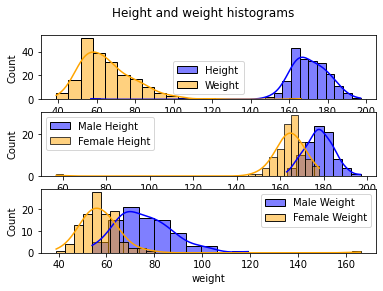

In [33]:
fig, ax = plt.subplots(nrows=3)
sns.histplot(df['height'], kde=True, color='blue', label='Height', ax = ax[0])
sns.histplot(df['weight'], kde=True, color='orange', label='Weight', ax = ax[0])
sns.histplot(df[df['sex'] == 'M']['height'], kde=True, color='blue', label='Male Height', ax = ax[1])
sns.histplot(df[df['sex'] == 'F']['height'], kde=True, color='orange', label='Female Height', ax = ax[1])
sns.histplot(df[df['sex'] == 'M']['weight'], kde=True, color='blue', label='Male Weight', ax = ax[2])
sns.histplot(df[df['sex'] == 'F']['weight'], kde=True, color='orange', label='Female Weight', ax = ax[2])
fig.suptitle('Height and weight histograms')
for axs in ax:
    axs.legend()

In [34]:
train.replace({'M':0, 'F':1}, inplace=True)
test.replace({'M':0, 'F':1}, inplace=True)

C:\Users\fenryux\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [35]:
train.head()

,sex,weight,height,repwt,repht
72,1,55,165,54.0,163.0
128,1,68,171,68.0,169.0
114,1,76,167,77.0,165.0
127,1,45,157,45.0,153.0
177,0,66,170,67.0,165.0


In [36]:
test.head()

,sex,weight,height,repwt,repht
13,1,64,168,64.0,165.0
36,1,56,166,54.0,165.0
54,0,64,177,NaN,NaN
97,1,50,169,50.0,165.0
107,1,57,167,55.0,164.0


In [37]:
X_train = train.loc[:, 'weight':'height'].to_numpy()
y_train = train['sex'].to_numpy()
clf = LogisticRegression().fit(X_train, y_train)
print('Score: ', clf.score(X_train, y_train))

Score:  0.91


In [38]:
X_test = test.loc[:, 'weight':'height'].to_numpy()
y_test = test['sex'].to_numpy()
predictions = clf.predict(X_test)
print('Accuracy_score: ', accuracy_score(predictions, y_test))

Accuracy_score:  0.91


C:\Users\fenryux\AppData\Local\Temp/ipykernel_1820/4089504130.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[0].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)
C:\Users\fenryux\AppData\Local\Temp/ipykernel_1820/4089504130.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[1].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)


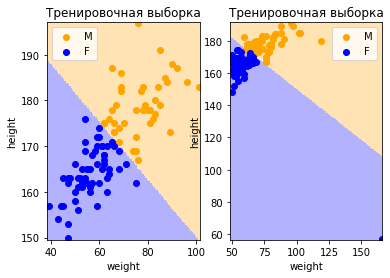

In [39]:
fig, ax = plt.subplots(ncols=2)

x_min, x_max = X_train[:, 0].min() - 0.5,  X_train[:, 0].max() + 0.5
y_min, y_max =  X_train[:, 1].min() - 0.5,  X_train[:, 1].max() + 0.5

h = 0.4
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
ax[0].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)

predictions = clf.predict(X_train)

ax[0].scatter(X_train[predictions == 0][:,0], X_train[predictions == 0][:,1], color='orange', label='M')
ax[0].scatter(X_train[predictions == 1][:,0], X_train[predictions == 1][:,1], color='blue', label='F')
ax[0].set_xlabel('weight')
ax[0].set_ylabel('height')
ax[0].set_title('Тренировочная выборка')
ax[0].legend()

x_min, x_max = X_test[:, 0].min() - 0.5,  X_test[:, 0].max() + 0.5
y_min, y_max =  X_test[:, 1].min() - 0.5,  X_test[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
ax[1].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)

predictions = clf.predict(X_test)
ax[1].scatter(X_test[predictions == 0][:,0], X_test[predictions == 0][:,1], color='orange', label='M')
ax[1].scatter(X_test[predictions == 1][:,0], X_test[predictions == 1][:,1], color='blue', label='F')
ax[1].set_xlabel('weight')
ax[1].set_ylabel('height')
ax[1].set_title('Тренировочная выборка')
ax[1].legend()

# 2.2

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [41]:
df = pd.read_excel('Folds5x2_pp.xlsx', sheet_name='Sheet1')

In [42]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [43]:
validation, test = train_test_split(df, test_size=0.5)

In [44]:
X_validation = validation.loc[:, 'AT':'RH'].to_numpy()
y_validation = validation['PE'].to_numpy()

In [45]:
X_test = test.loc[:, 'AT':'RH'].to_numpy()
y_test = test['PE'].to_numpy()

In [46]:
clf = LinearRegression().fit(X_validation, y_validation)
print('Score: ', lnr.score(X_validation, y_validation))

NameError: name 'lnr' is not defined

In [ ]:
predictions = lnr.predict(X_validation)
print('R2 = ', r2_score(predictions, y_validation))
print('MSE = ', mean_squared_error(predictions, y_validation))

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_validation, predictions)
ax.plot(y_validation,y_validation, color='black')
ax.set_xlabel('Наблюдение')
ax.set_ylabel('Оценка')